<a href="https://colab.research.google.com/github/Sunny18-2002/IIITH-files/blob/main/Probabilistic_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 137s 284ms/step - loss: 0.1743 - val_loss: 0.1169
Epoch 2/10
469/469 [==============================] - 123s 261ms/step - loss: 0.1135 - val_loss: 0.1087
Epoch 3/10
469/469 [==============================] - 123s 262ms/step - loss: 0.1073 - val_loss: 0.1042
Epoch 4/10
469/469 [==============================] - 124s 265ms/step - loss: 0.1040 - val_loss: 0.1018
Epoch 5/10
469/469 [==============================] - 122s 259ms/step - loss: 0.1021 - val_loss: 0.1010
Epoch 6/10
469/469 [==============================] - 121s 258ms/step - loss: 0.1009 - val_loss: 0.0995
Epoch 7/10
469/469 [==============================] - 121s 258ms/step - loss: 0.0999 - val_loss: 0.0988
Epoch 8/10
469/469 [==============================] - 123s 261ms/step - loss: 0.0993 - val_loss: 0.0983
Epoch 9/10
469/469 [==============================] - 120s 255ms/step - loss: 0.0986 - val_loss: 0.0977

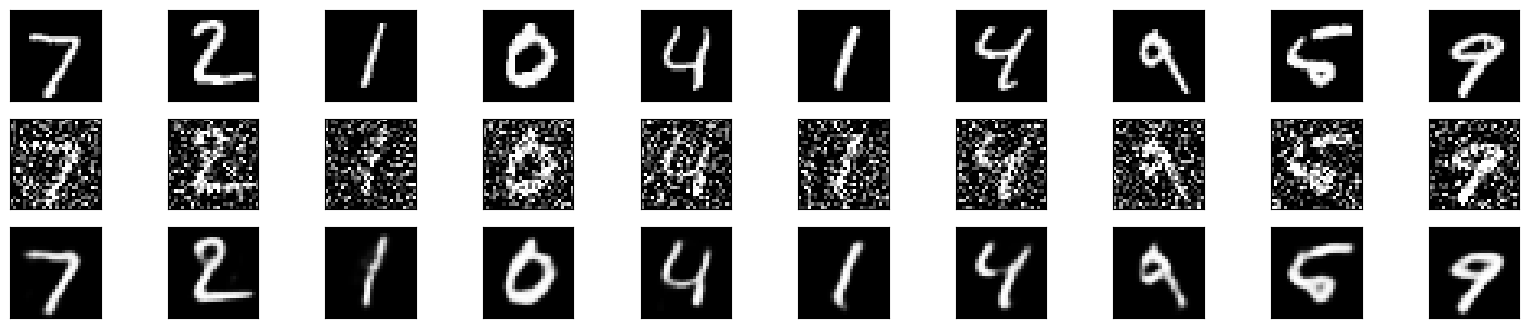

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the Convolutional Autoencoder model
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Denoise some test images
denoised_images = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0356 - val_loss: 0.0205
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0195 - val_loss: 0.0183
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0182 - val_loss: 0.0176
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0180 - val_loss: 0.0176
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0176 - val_loss: 0.0171
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


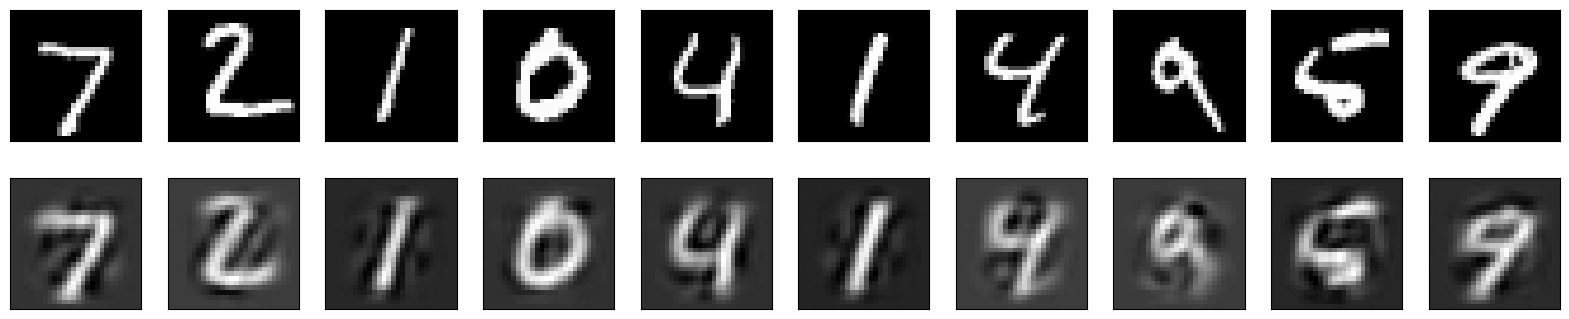

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the Autoencoder model with reduced hidden layer size and linear activation
input_img = Input(shape=(784,))  # Flatten the input images

# Reduce the size of the hidden layer for dimensionality reduction
encoded = Dense(32, activation='relu')(input_img)

# Linear activation in the output layer
decoded = Dense(784, activation='linear')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some test images
encoded_images = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
